# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv")
display (df.head())

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [2]:
filtered_df = df[(df['Total Claim Amount'] > 1000) & (df['Response'] == 'Yes')]
display (filtered_df)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,10351,FN44127,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10373,10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,NaN
10487,10487,IX60941,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10565,10565,QO62792,Oregon,7840.165778,Yes,Extended,College,1/14/11,Employed,M,...,2.0,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,NaN,NaN,NaN


2. Using the original dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [3]:
avg_claim_amount = filtered_df.groupby(['Policy Type', 'Gender'])['Total Claim Amount'].mean().reset_index()
display (avg_claim_amount)


,Policy Type,Gender,Total Claim Amount
0,Corporate Auto,F,1138.400000
1,Corporate Auto,M,1171.150007
2,Personal Auto,F,1214.853805
3,Personal Auto,M,1137.861443
4,Special Auto,F,1358.400000
5,Special Auto,M,1017.500015


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [4]:
state_counts = df['State'].value_counts()
states_with_more_than_500_customers = state_counts[state_counts > 500]
display (states_with_more_than_500_customers)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [5]:
summary_stats = df.groupby(['Education', 'Gender'])['Customer Lifetime Value'].agg([np.max, np.min, np.median]).reset_index()
display(summary_stats)

,Education,Gender,amax,amin,median
0,Bachelor,F,73225.95652,1904.000852,5640.505303
1,Bachelor,M,67907.27050,1898.007675,5548.031892
2,College,F,61850.18803,1898.683686,5623.611187
3,College,M,61134.68307,1918.119700,6005.847375
4,Doctor,F,44856.11397,2395.570000,5332.462694
5,Doctor,M,32677.34284,2267.604038,5577.669457
6,High School or Below,F,55277.44589,2144.921535,6039.553187
7,High School or Below,M,83325.38119,1940.981221,6286.731006
8,Master,F,51016.06704,2417.777032,5729.855012
9,Master,M,50568.25912,2272.307310,5579.099207


## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [6]:
# your code goes here

In [7]:
#Show DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [8]:
#Describe DataFrame.
df.describe()


,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
#Show a plot of the total number of responses.
import matplotlib.pyplot as plt
import seaborn as sns


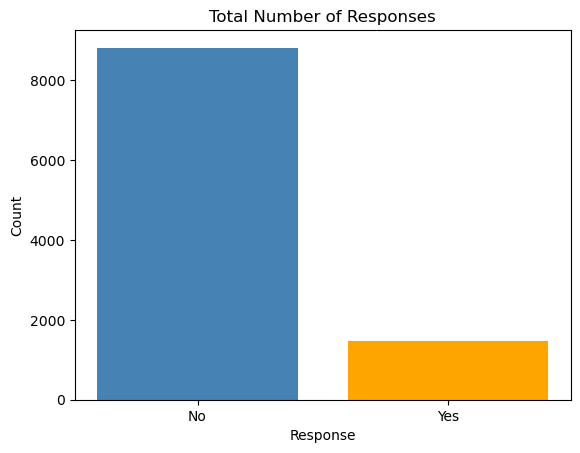

In [10]:
fig, ax = plt.subplots()
ax.bar(x = df['Response'].value_counts().index, height = df['Response'].value_counts().values, color = ['steelblue', 'orange'])
ax.set_xlabel("Response")
ax.set_ylabel("Count")
ax.set_title('Total Number of Responses')
plt.show()

In [11]:
#Show a plot of the response rate by the sales channel.

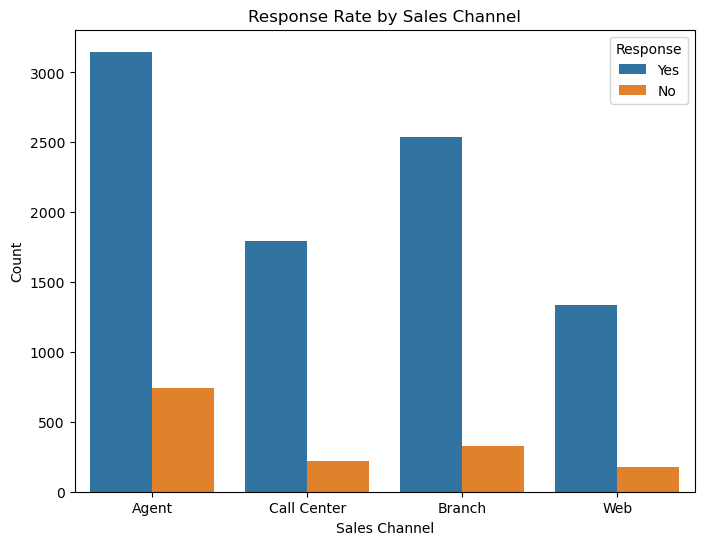

In [12]:

plt.figure(figsize=(8, 6))
sns.countplot(x="Sales Channel", hue="Response", data=df)
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.title("Response Rate by Sales Channel")
plt.legend(title="Response", labels=["Yes", "No"])
plt.show()

In [13]:
#Show a plot of the response rate by the total claim amount.

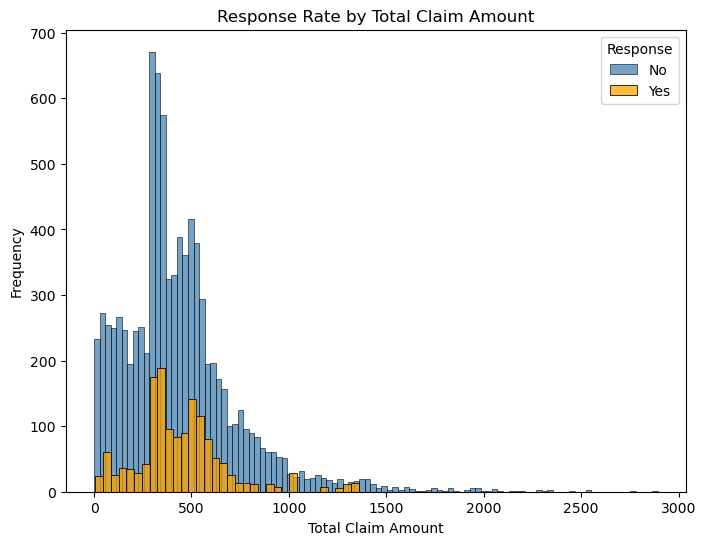

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['Response'] == 'No']['Total Claim Amount'], label="No", color="steelblue")
sns.histplot(data=df[df['Response'] == 'Yes']['Total Claim Amount'],  label="Yes", color="orange")
plt.xlabel("Total Claim Amount")
plt.ylabel("Frequency")
plt.title("Response Rate by Total Claim Amount")
plt.legend(title="Response", loc="upper right")
plt.show()

In [15]:
#Show a plot of the response rate by income.

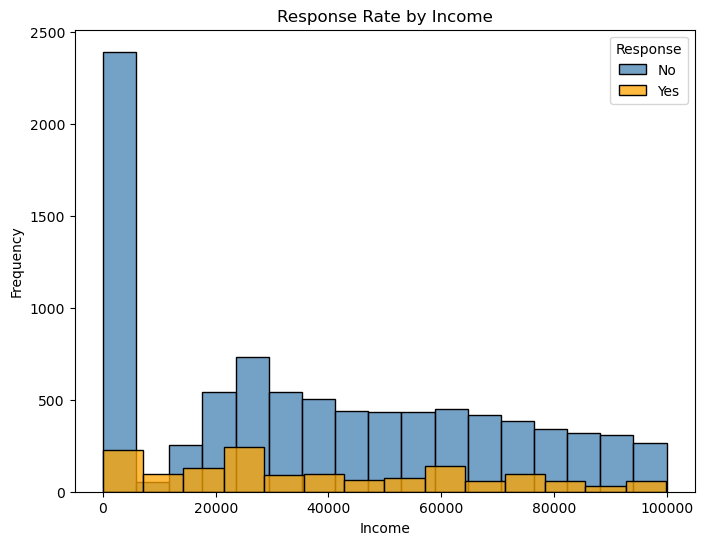

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['Response'] == 'No']['Income'], label="No", color="steelblue")
sns.histplot(data=df[df['Response'] == 'Yes']['Income'],  label="Yes", color="orange")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Response Rate by Income")
plt.legend(title="Response", loc="upper right")
plt.show()

In [37]:

%matplotlib inline
# Separate numerical and categorical columns
numerical = df.select_dtypes(include=[np.number])
display (numerical.head())
categoricals = df.select_dtypes(include=[object])
display(categoricals.head())

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


In [51]:
# Visualize the distribution of numerical variables
for column in numerical.columns:
    plt.figure(figsize=(8, 4))
 

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Total Claim Amount Distribution (Seaborn)')

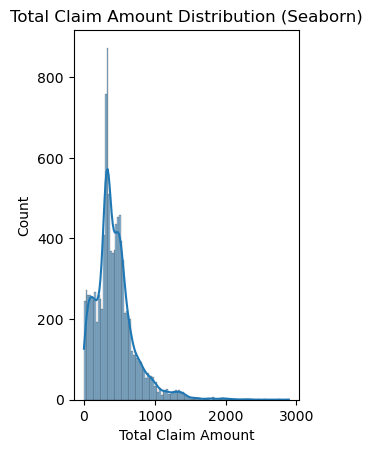

In [34]:
 # Seaborn distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=numerical, x=column, kde=True)
plt.title(column + ' Distribution (Seaborn)')

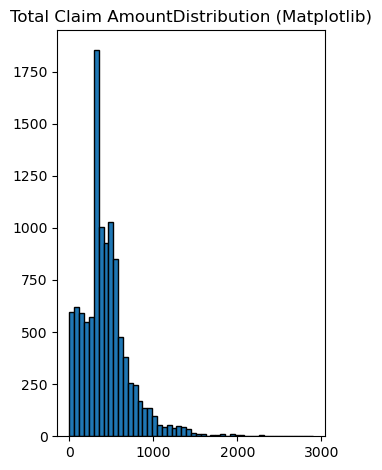

In [52]:
  # Matplotlib histogram
plt.subplot(1, 2, 2)
plt.hist(df[column], bins=50, edgecolor='k')
plt.title(column+"Distribution (Matplotlib)")
    
plt.tight_layout()
plt.show()

In [ ]:
# we can see that the different numerical columns do not look symmetrical they are skewed to the right

In [55]:

# Compute skewness
skewness = numerical[column].skew()
if skewness > 0:
        comment = "positively skewed"
elif skewness < 0:
        comment = "negatively skewed"
else:
        comment = "approximately symmetric"
rounded_skewness = round(skewness, 2)   
print(column + ' Skewness: {} ({})'.format(rounded_skewness, comment))

Total Claim Amount Skewness: 1.73 (positively skewed)


In [71]:
def find_highly_correlated_features(correlation_matrix, threshold=0.9):
    highly_correlated = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]

                # Check which feature is less correlated with 'total_claim_amount'
                if abs(correlation_matrix[colname_i]['total_claim_amount']) > abs(correlation_matrix[colname_j]['total_claim_amount']):
                    drop_feature = colname_j
                else:
                    drop_feature = colname_i

                if drop_feature not in highly_correlated:
                    highly_correlated.append(drop_feature)

    return highly_correlated


    

In [72]:
# Call the function and store the result
highly_correlated_features = find_highly_correlated_features(correlation_matrix, threshold=0.9)

# Now you can use highly_correlated_features outside of the function
print("Highly Correlated Features:", highly_correlated_features)


Highly Correlated Features: []


In [ ]:
#we do not see a Highly correlated features so we do not have to drop any features

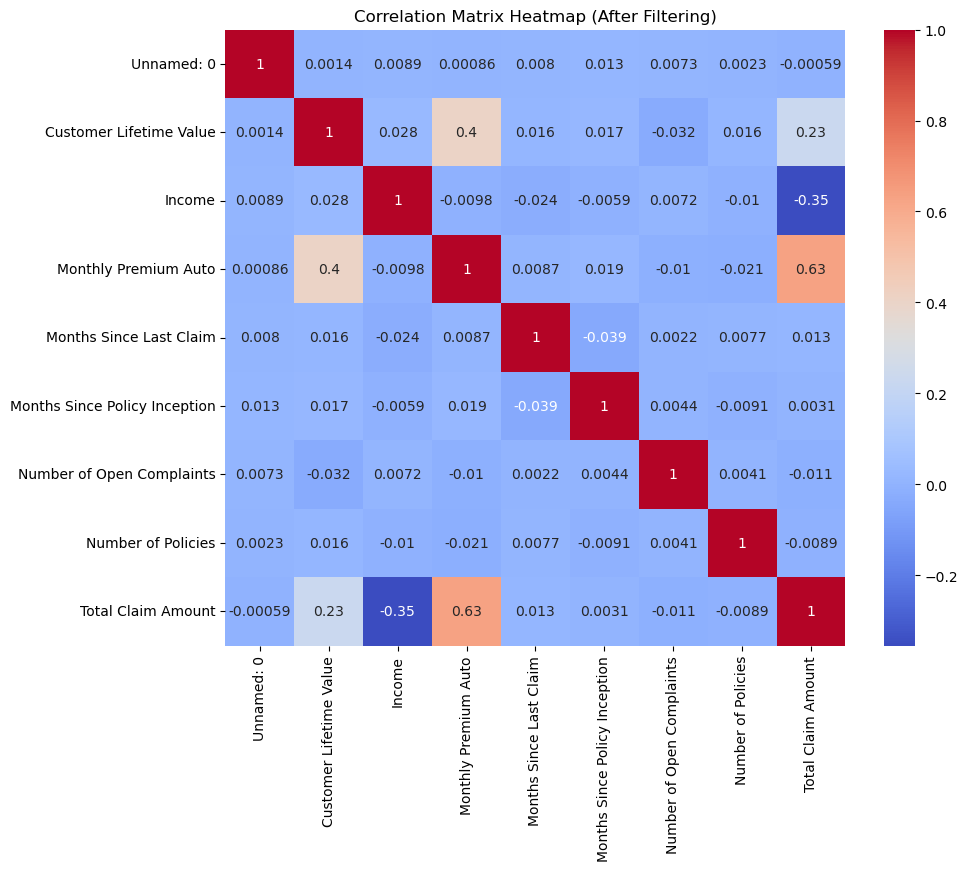

In [73]:
# Plot the heatmap of the correlation matrix after filtering
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap (After Filtering)")
plt.show()